## Import libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [6]:
df = pd.read_csv("C:\\Users\\LAPTOPINN\\Desktop\\Elevvo\\Machine learning task\\Task 1 student performance\\StudentPerformanceFactors.csv")

In [8]:
print(df.head(5))

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [12]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

## Data Cleaning

In [22]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [26]:
# Fill categorical missing values with mode
df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0])
df["Distance_from_Home"] = df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0])
df["Teacher_Quality"] = df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0])

In [28]:
# Drop duplicates if any
df = df.drop_duplicates()

In [32]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [34]:
# Encode categorical variables into dummy (0/1) variables
df_encoded = pd.get_dummies(df, drop_first=True)

## Features & Target

In [37]:
X = df_encoded.drop("Exam_Score", axis=1)   # all features except target
y = df_encoded["Exam_Score"]

In [39]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LinearRegression Model

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [49]:
print("Train/Test Split Evaluation")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Train/Test Split Evaluation
MSE: 3.2560199870428943
RMSE: 1.804444509272284
R² Score: 0.7696495724907312


## k-Fold Cross Validation

In [56]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [58]:
cv_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")
cv_mse = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")

In [62]:
print("\nk-Fold Cross Validation (5 folds)")
print("R² scores per fold:", cv_scores)
print("Average R²:", np.mean(cv_scores))
print("MSE per fold:", cv_mse)
print("Average MSE:", np.mean(cv_mse))


k-Fold Cross Validation (5 folds)
R² scores per fold: [0.76964957 0.7467365  0.89753553 0.68294966 0.58852234]
Average R²: 0.7370787198786016
MSE per fold: [3.25601999 3.49929357 1.27532622 5.61945021 7.19795843]
Average MSE: 4.169609682786963


## Visualizations

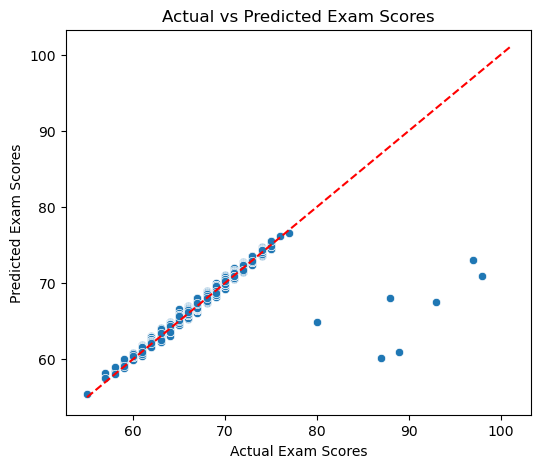

In [65]:
#Actual vs Predicted values (scatter plot)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.show()

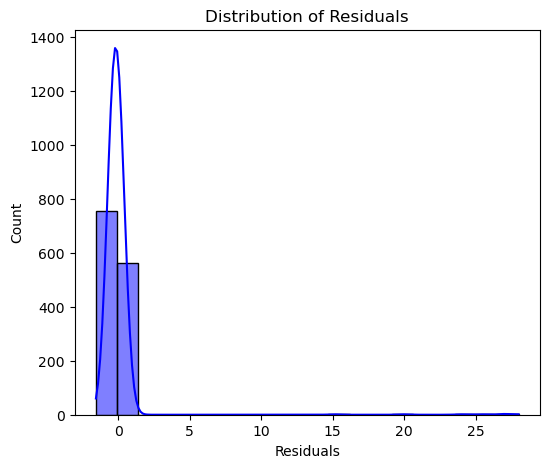

In [67]:
#Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(6, 5))
sns.histplot(residuals, kde=True, bins=20, color="blue")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

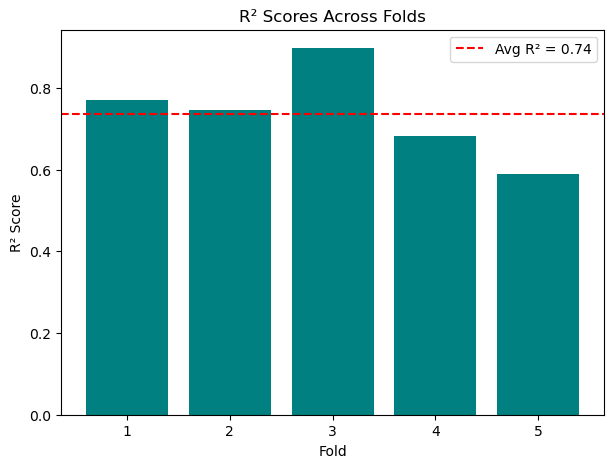

In [69]:
#k-Fold R² Scores bar chart
plt.figure(figsize=(7, 5))
plt.bar(range(1, len(cv_scores)+1), cv_scores, color="teal")
plt.axhline(np.mean(cv_scores), color="red", linestyle="--", label=f"Avg R² = {np.mean(cv_scores):.2f}")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title("R² Scores Across Folds")
plt.legend()
plt.show()

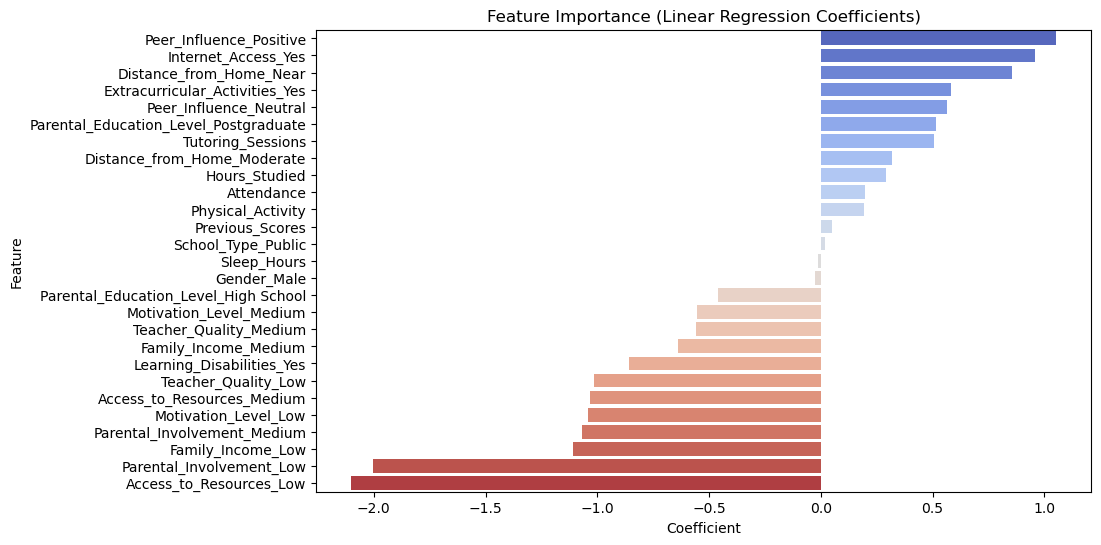

In [73]:
#Feature Importance (Coefficients)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients, hue="Feature", palette="coolwarm", legend=False)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()